# Driving behavior - Clean data

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [190]:
df_training = pd.read_csv("data/train_motion_data.csv")
df_testing = pd.read_csv("data/test_motion_data.csv")

print(df_training.head())
print(df_testing.head())

       AccX      AccY      AccZ     GyroX     GyroY     GyroZ   Class  \
0  0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938  NORMAL   
1 -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536  NORMAL   
2 -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888  NORMAL   
3  0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902  NORMAL   
4  0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902  NORMAL   

   Timestamp  
0    3581629  
1    3581630  
2    3581630  
3    3581631  
4    3581631  
       AccX      AccY      AccZ     GyroX     GyroY     GyroZ       Class  \
0  0.758194 -0.217791  0.457263  0.000000  0.000000  0.000000  AGGRESSIVE   
1  0.667560 -0.038610  0.231416 -0.054367 -0.007712  0.225257  AGGRESSIVE   
2  2.724449 -7.584121  2.390926  0.023824  0.013668 -0.038026  AGGRESSIVE   
3  2.330950 -7.621754  2.529024  0.056810 -0.180587 -0.052076  AGGRESSIVE   
4  2.847215 -6.755621  2.224640 -0.031765 -0.035201  0.035277  AGGRESSIVE   

   Times

In [191]:
print(df_training.isna().sum())
print(df_testing.isna().sum())

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64
AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64


## Data distribution analysis

In [192]:
observations, variables = df_training.shape

print(f"Observations: {observations}, Variables: {variables}")

Observations: 3644, Variables: 8


In [193]:
df_training.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


### Check for data balance

In [194]:
y = df_training.Class

print(y.unique())
print(y.value_counts())

normal_count = y.value_counts()["NORMAL"]
aggressive_count = y.value_counts()["AGGRESSIVE"]
slow_count = y.value_counts()["SLOW"]

Ntotal = normal_count + aggressive_count + slow_count

print(f"Proportion of Normal is {(normal_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Aggressive is {(aggressive_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Slow is {(slow_count / Ntotal) * 100:0.1f}%")

['NORMAL' 'AGGRESSIVE' 'SLOW']
SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: Class, dtype: int64
Proportion of Normal is 32.9%
Proportion of Aggressive is 30.5%
Proportion of Slow is 36.5%


Class 0: 1331
Class 1: 1200
Class 2: 1113


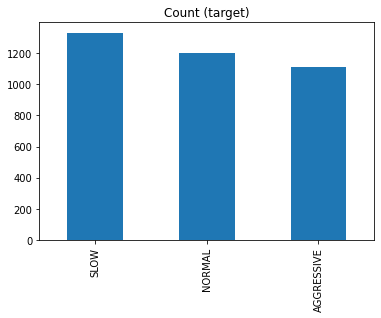

In [195]:
target_count = df_training.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])

target_count.plot(kind='bar', title='Count (target)');

### Check ranges for the data

<AxesSubplot:xlabel='AccX', ylabel='Timestamp'>

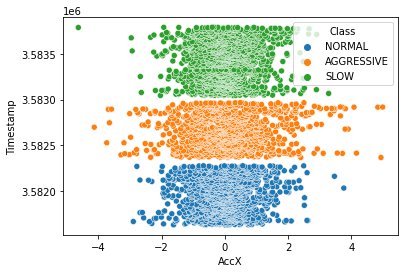

In [196]:
sns.scatterplot(data=df_training, x="AccX", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='AccY', ylabel='Timestamp'>

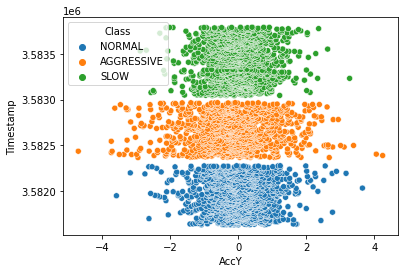

In [197]:
sns.scatterplot(data=df_training, x="AccY", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='AccZ', ylabel='Timestamp'>

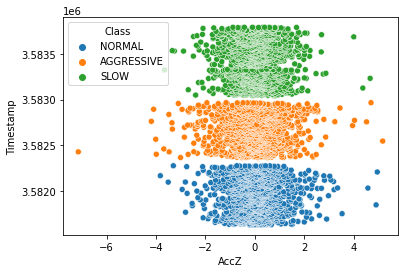

In [198]:
sns.scatterplot(data=df_training, x="AccZ", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='GyroX', ylabel='Timestamp'>

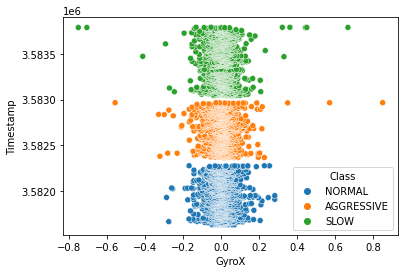

In [199]:
sns.scatterplot(data=df_training, x="GyroX", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='GyroY', ylabel='Timestamp'>

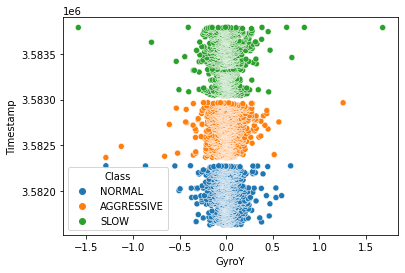

In [200]:
sns.scatterplot(data=df_training, x="GyroY", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='GyroZ', ylabel='Timestamp'>

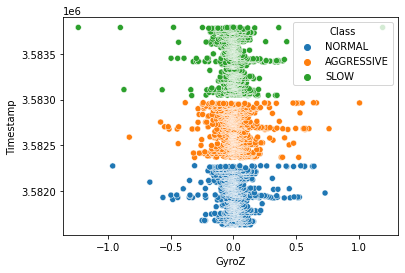

In [201]:
sns.scatterplot(data=df_training, x="GyroZ", y="Timestamp", hue="Class")

As we can see all types of driver are in the same ranges for the data we have, so it would be difficult to predict the type of driver unless we have more data or we try to do something with the data we already have

## Change categories from string to number

In [202]:
df_training = df_training.replace({"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,0,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,0,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,0,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,0,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,0,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,2,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,2,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,2,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,2,3583791


## Checar con ANOVA

Checamos los datos con la metodologia de ANOVA ya que queremos ver que tanto influye uan variable en el tipo de clase

$H_0: \mu_1=\mu_2=...=\mu_I$

$H_a$ al menos una es diferente

si p-valor $\leq 0.05$ entonces se rechaza la $H_0$

In [203]:
modelo = ols(formula='AccX~C(Class)', data=df_training)
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AccX   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.914
Date:                Fri, 02 Sep 2022   Prob (F-statistic):             0.0201
Time:                        18:40:55   Log-Likelihood:                -5113.5
No. Observations:                3644   AIC:                         1.023e+04
Df Residuals:                    3641   BIC:                         1.025e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0180      0.028     -0.632      0.527      -0.074       0.038
C(Class)[T.1]     0.1141      0.041      2.783      0.005       0.034       0.194
C(Class)[T.2]     0.0646      0.039      1.648      0.099      -0.012       0.141
==============================================================================
Omnibus:                      161.688   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.433
Skew:                           0.199   Prob(JB):                     3.79e-96
Kurtosis:                       4.654   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como p-valor $\leq 0.05$, la $H_0$ se rechaza y se usa la $H_a$ que significa la clase si tiene que ver con la aceleracion en X

In [204]:
modelo = ols(formula='AccY~C(Class)', data=df_training)
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AccY   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.300
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           9.36e-05
Time:                        18:40:55   Log-Likelihood:                -4790.7
No. Observations:                3644   AIC:                             9587.
Df Residuals:                    3641   BIC:                             9606.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0277      0.026     -1.066      0.286      -0.079       0.023
C(Class)[T.1]    -0.1427      0.038     -3.805      0.000      -0.216      -0.069
C(Class)[T.2]    -0.0057      0.036     -0.159      0.873      -0.076       0.065
==============================================================================
Omnibus:                      140.713   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.857
Skew:                          -0.054   Prob(JB):                     2.48e-92
Kurtosis:                       4.663   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como p-valor $\leq 0.05$, la $H_0$ se rechaza y se usa la $H_a$ que significa la clase si tiene que ver con la aceleracion en Y

In [205]:
modelo = ols(formula='AccZ~C(Class)', data=df_training)
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AccZ   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9199
Date:                Fri, 02 Sep 2022   Prob (F-statistic):              0.399
Time:                        18:40:55   Log-Likelihood:                -5114.3
No. Observations:                3644   AIC:                         1.023e+04
Df Residuals:                    3641   BIC:                         1.025e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0344      0.028      1.211      0.226      -0.021       0.090
C(Class)[T.1]    -0.0556      0.041     -1.356      0.175      -0.136       0.025
C(Class)[T.2]    -0.0251      0.039     -0.641      0.522      -0.102       0.052
==============================================================================
Omnibus:                      237.235   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1112.023
Skew:                           0.034   Prob(JB):                    3.37e-242
Kurtosis:                       5.705   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como p-valor $0.399 > 0.05$, la $H_0$ se acepta que nos dice que la clase no influye en la aceleracion en Z

In [206]:
modelo = ols(formula='GyroX~C(Class)', data=df_training)
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GyroX   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3530
Date:                Fri, 02 Sep 2022   Prob (F-statistic):              0.703
Time:                        18:40:56   Log-Likelihood:                 4684.7
No. Observations:                3644   AIC:                            -9363.
Df Residuals:                    3641   BIC:                            -9345.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0019      0.002      0.986      0.324      -0.002       0.006
C(Class)[T.1]    -0.0017      0.003     -0.601      0.548      -0.007       0.004
C(Class)[T.2]     0.0005      0.003      0.204      0.838      -0.005       0.006
==============================================================================
Omnibus:                      979.612   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81712.952
Skew:                           0.195   Prob(JB):                         0.00
Kurtosis:                      26.195   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
modelo = ols(formula='GyroY~C(Class)', data=df_training)
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GyroY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1397
Date:                Fri, 02 Sep 2022   Prob (F-statistic):              0.870
Time:                        18:40:56   Log-Likelihood:                 2372.6
No. Observations:                3644   AIC:                            -4739.
Df Residuals:                    3641   BIC:                            -4721.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0009      0.004     -0.251      0.801      -0.008       0.006
C(Class)[T.1]    -0.0020      0.005     -0.375      0.708      -0.012       0.008
C(Class)[T.2]     0.0007      0.005      0.133      0.894      -0.009       0.011
==============================================================================
Omnibus:                     1088.730   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128365.404
Skew:                          -0.290   Prob(JB):                         0.00
Kurtosis:                      32.071   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
modelo = ols(formula='GyroZ~C(Class)', data=df_training)
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GyroZ   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.343
Date:                Fri, 02 Sep 2022   Prob (F-statistic):              0.261
Time:                        18:40:56   Log-Likelihood:                 2690.9
No. Observations:                3644   AIC:                            -5376.
Df Residuals:                    3641   BIC:                            -5357.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0095      0.003      2.853      0.004       0.003       0.016
C(Class)[T.1]     0.0016      0.005      0.327      0.744      -0.008       0.011
C(Class)[T.2]    -0.0056      0.005     -1.224      0.221      -0.015       0.003
==============================================================================
Omnibus:                      939.534   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52824.174
Skew:                           0.331   Prob(JB):                         0.00
Kurtosis:                      21.641   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Information gain

In [209]:
from sklearn.feature_selection import mutual_info_classif

feature_columns = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY','GyroZ', 'Timestamp']

# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(df_training.drop(columns="Class"), df_training.Class).reshape(-1, 1),
                         columns=['Coefficient'], index=feature_columns)

coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Timestamp,1.096179
AccY,0.042545
AccX,0.021876
GyroZ,0.013010
AccZ,0.006019
GyroY,0.001836
GyroX,0.000000


## Normalize the data

We normalize the data because we are working with different types of units for the accelerometer and gyroscope variables and we normalize them to work in checking the correlation of the data

In [210]:
df_norm = df_training
y = df_norm.Class

df_norm = ((df_norm - np.min(df_norm)) / (np.max(df_norm) - np.min(df_norm))) * 1000
df_norm.Class = y

df_norm

/Users/andresnowak/miniforge3/envs/AI/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/andresnowak/miniforge3/envs/AI/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,481.863337,525.413468,580.070704,506.676844,432.311146,551.472437,0,0.000000
1,312.994911,404.396328,563.491702,451.735981,501.495889,565.315882,0,0.462535
2,420.061680,511.728660,597.974781,457.458987,476.813764,545.683362,0,0.462535
3,558.611704,499.873287,634.288512,513.162917,476.626779,532.091617,0,0.925069
4,492.437057,612.341615,574.652470,488.744756,484.667168,532.091617,0,0.925069
...,...,...,...,...,...,...,...,...
3639,577.028672,299.868299,717.090913,750.858453,603.590129,0.000000,2,999.074931
3640,280.845957,627.697437,572.274738,670.354838,684.554977,312.861812,2,999.537465
3641,458.703602,608.958241,508.014137,695.154527,361.256550,531.839918,2,999.537465
3642,445.548578,532.932880,612.092150,386.875241,491.959614,507.425118,2,1000.000000


## Check the correlation of the data

<AxesSubplot:>

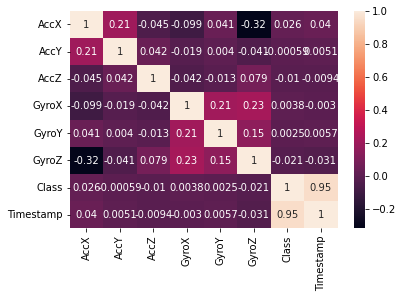

In [211]:
sns.heatmap(df_norm.corr(), annot=True)

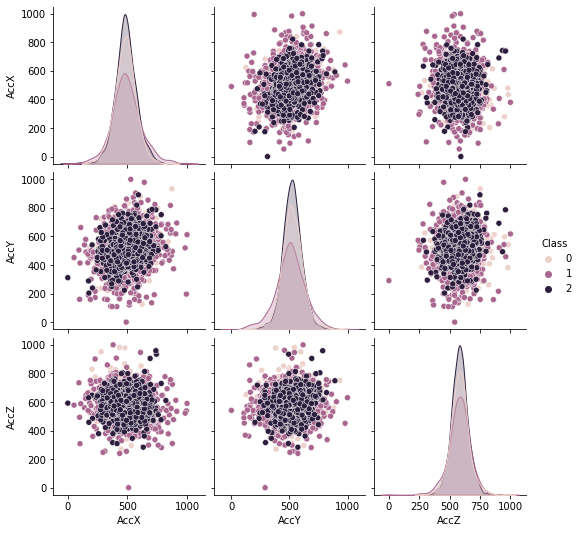

In [212]:
sns.pairplot(df_norm[["AccX", "AccY", "AccZ", "Class"]], hue="Class")

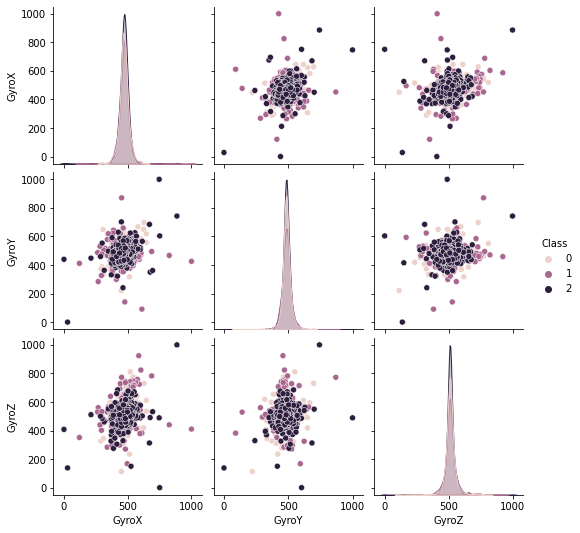

In [213]:
sns.pairplot(df_norm[["GyroX", "GyroY", "GyroZ", "Class"]], hue="Class")

### Accelerometer and gyroscope android

We assume the phone was lying down in testing

#### Accelerometer

![accelerometer.png](images/accelerometer.png)

Seeing our correlation heatmap, ANOVA test and the image for the accelerometer, we can say that probably the acceleration in the Z axis would not help us to create our models, because the acceleration is in the axis going up (if we assume the phone was lying down), in the only things that would probably help us is to check how a person behave in things like road stoppers, but we will still use it to check if our theories are correct.

#### Gyroscope

![gyroscope.png](images/gyroscope.png)
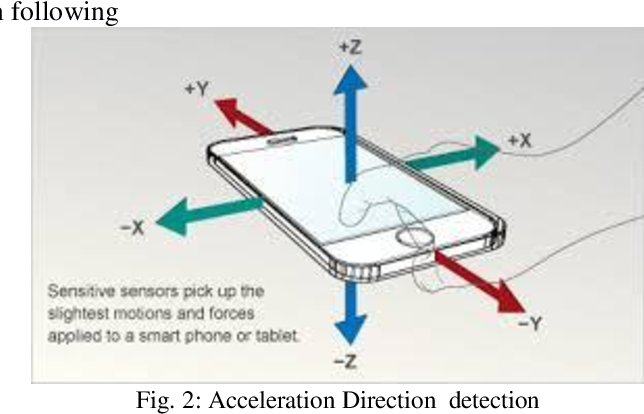

For the gyroscope we first though that the y axis would not be a neccessary variable because of the axis it represents (if we assume the phone is lying down), but with our heatmap and ANOVA test we can see that at least in the way these data is presented right now, it doesn't tell us any information about the type of driving behavior we have, and with the test we have done with different models (like logistic regression and kNN) we have seen that removing these variables doesn't affect the result so with these tests, at least with how we have the data represented right now, we can see that these variables don't help us in predicting the type of driving behavior a person has.

### Timestamp

And lastly timestamp we can say that it isn't a good variable because it doesn't represent how our driver behaves it is only telling us the time when we read the data, and it would just cause overfitting or be noise in the training of our model, so we can remove it.

## Feature training

### Change Numbers to string again

In [214]:
df_training = df_training.replace({"Class": {0: "NORMAL", 1: "AGGRESSIVE", 2: "SLOW"}})
df_training

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


### Calculate difference in acceleration between readings

In [215]:
df_training["DiffAccX"] = df_training["AccX"] - df_training["AccX"].shift(1)
df_training["DiffAccX"] = df_training["DiffAccX"].fillna(0)
df_training["DiffAccX"]

0       0.000000
1      -1.624864
2       1.030204
3       1.333138
4      -0.636737
          ...   
3639    2.374675
3640   -2.849891
3641    1.711359
3642   -0.126579
3643   -0.053005
Name: DiffAccX, Length: 3644, dtype: float64

In [216]:
df_training["DiffAccY"] = df_training["AccY"] - df_training["AccY"].shift(1)
df_training["DiffAccY"] = df_training["DiffAccY"].fillna(0)
df_training["DiffAccY"]

0       0.000000
1      -1.082492
2       0.960082
3      -0.106046
4       1.006023
          ...   
3639   -1.824629
3640    2.932414
3641   -0.167621
3642   -0.680043
3643    0.338957
Name: DiffAccY, Length: 3644, dtype: float64

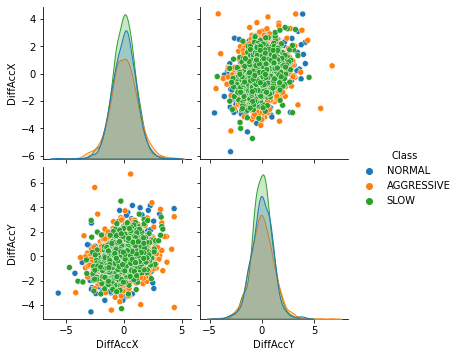

In [217]:
sns.pairplot(df_training[["DiffAccX", "DiffAccY", "Class"]], hue="Class")

<AxesSubplot:xlabel='DiffAccX', ylabel='Timestamp'>

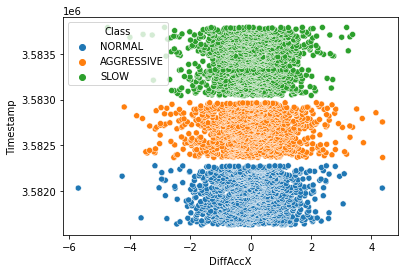

In [218]:
sns.scatterplot(data=df_training, x="DiffAccX", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='DiffAccY', ylabel='Timestamp'>

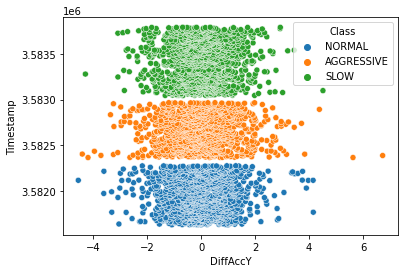

In [219]:
sns.scatterplot(data=df_training, x="DiffAccY", y="Timestamp", hue="Class")

### Calculate speed based on acceleration
time assume 0.5s between readings

In [220]:
df_training["VelX"] = np.zeros(df_training.shape[0])
df_training["VelX"] = df_training["VelX"].shift(1) + df_training["AccX"] * 0.5

# change to km/h to understand the data easier
df_training["VelX"] = (df_training["VelX"] * 3600) / 1000
df_training["VelX"] = df_training["VelX"].fillna(0)
df_training["VelX"]

0       0.000000
1      -2.924755
2      -1.070388
3       1.329261
4       0.183134
          ...   
3639    1.648238
3640   -3.481566
3641   -0.401120
3642   -0.628962
3643   -0.724370
Name: VelX, Length: 3644, dtype: float64

In [221]:
df_training["VelY"] = np.zeros(df_training.shape[0])
df_training["VelY"] = df_training["VelY"].shift(1) + df_training["AccY"] * 0.5

# change to km/h to understand the data easier
df_training["VelY"] = (df_training["VelY"] * 3600) / 1000
df_training["VelY"] = df_training["VelY"].fillna(df_training["VelY"].iloc[-2])
df_training["VelY"]

0       0.121069
1      -1.948485
2      -0.220338
3      -0.411220
4       1.399622
          ...   
3639   -3.631481
3640    1.646864
3641    1.345146
3642    0.121069
3643    0.731192
Name: VelY, Length: 3644, dtype: float64

In [222]:
df_training["VelZ"] = np.zeros(df_training.shape[0])
df_training["VelZ"] = df_training["VelZ"].shift(1) + df_training["AccZ"] * 0.5

# change to km/h to understand the data easier
df_training["VelZ"] = (df_training["VelZ"] * 3600) / 1000
df_training["VelZ"] = df_training["VelZ"].fillna(df_training["VelZ"].iloc[-2])
df_training["VelZ"]

0       0.709862
1      -0.367529
2       0.396903
3       1.201918
4      -0.120113
          ...   
3639    3.037509
3640   -0.172824
3641   -1.597373
3642    0.709862
3643   -0.761416
Name: VelZ, Length: 3644, dtype: float64

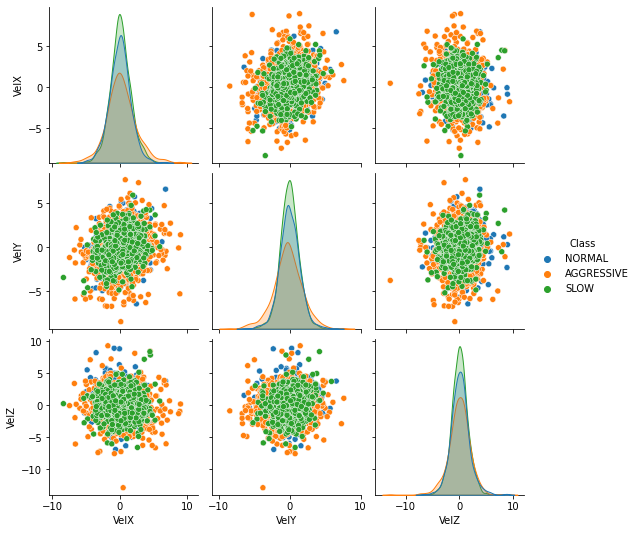

In [223]:
sns.pairplot(df_training[["VelX", "VelY", "VelZ", "Class"]], hue="Class")

<AxesSubplot:xlabel='VelX', ylabel='Timestamp'>

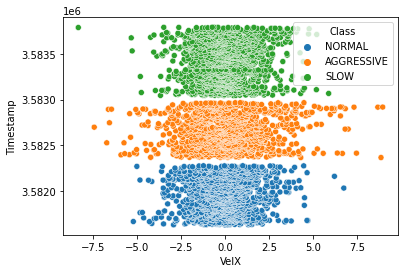

In [224]:
sns.scatterplot(data=df_training, x="VelX", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='VelY', ylabel='Timestamp'>

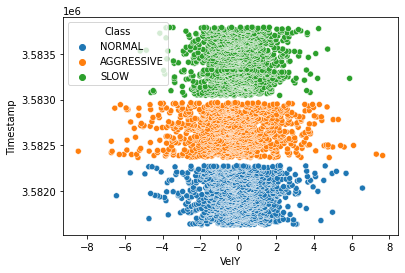

In [225]:
sns.scatterplot(data=df_training, x="VelY", y="Timestamp", hue="Class")

<AxesSubplot:xlabel='VelZ', ylabel='Timestamp'>

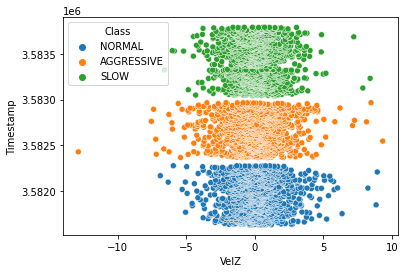

In [226]:
sns.scatterplot(data=df_training, x="VelZ", y="Timestamp", hue="Class")

#### Remove negative velocity

In [227]:
df_positive = df_training
df_positive = df_positive[df_positive["VelX"] >= 0]
df_positive

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,DiffAccX,DiffAccY,VelX,VelY,VelZ
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629,0.000000,0.000000,0.000000,0.121069,0.709862
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631,1.333138,-0.106046,1.329261,-0.411220,1.201918
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631,-0.636737,1.006023,0.183134,1.399622,-0.120113
5,0.158470,0.345891,0.355274,0.021533,0.115454,0.014584,NORMAL,3581632,0.056728,-0.431676,0.285245,0.622604,0.639494
6,0.078171,-0.349180,0.270652,0.034361,-0.030543,0.050625,NORMAL,3581632,-0.080299,-0.695071,0.140708,-0.628524,0.487173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.702303,-0.930822,0.809290,0.001985,-0.172264,-0.025733,SLOW,3583786,1.245684,1.190620,1.264145,-1.675479,1.456722
3633,0.319258,0.272088,0.535243,0.018479,0.106901,-0.062385,SLOW,3583786,-0.383045,1.202910,0.574663,0.489758,0.963437
3634,0.402702,0.432955,-0.683754,-0.090255,-0.085521,0.362167,SLOW,3583787,0.083444,0.160867,0.724863,0.779319,-1.230757
3636,0.099691,-1.005182,0.293478,-0.751822,-0.150273,-0.246255,SLOW,3583788,1.001618,-0.518150,0.179444,-1.809327,0.528260


<AxesSubplot:xlabel='VelX', ylabel='Timestamp'>

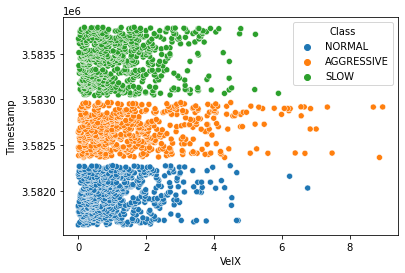

In [228]:
sns.scatterplot(data=df_positive, x="VelX", y="Timestamp", hue="Class")

In [229]:
df_positive = df_training
df_positive = df_positive[df_positive["VelY"] >= 0]

<AxesSubplot:xlabel='VelY', ylabel='Timestamp'>

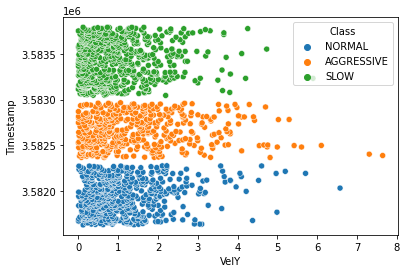

In [230]:
sns.scatterplot(data=df_positive, x="VelY", y="Timestamp", hue="Class")

In [231]:
df_positive = df_training
df_positive = df_positive[df_positive["VelZ"] >= 0]

<AxesSubplot:xlabel='VelZ', ylabel='Timestamp'>

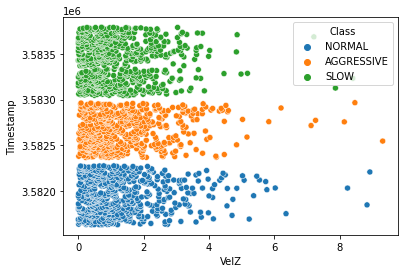

In [232]:
sns.scatterplot(data=df_positive, x="VelZ", y="Timestamp", hue="Class")

#### Value counts

Class 0: 666
Class 1: 597
Class 1: 565


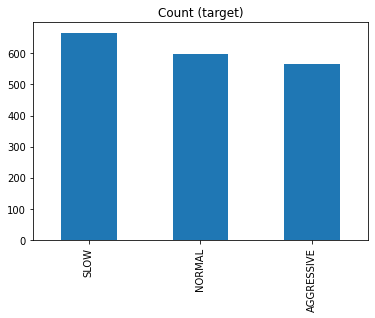

In [233]:
df_positive = df_training
df_positive = df_positive[df_positive["VelX"] >= 0]

target_count = df_positive.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 1:', target_count[2])

target_count.plot(kind='bar', title='Count (target)');

Class 0: 643
Class 1: 555
Class 1: 475


<AxesSubplot:title={'center':'Count (target)'}>

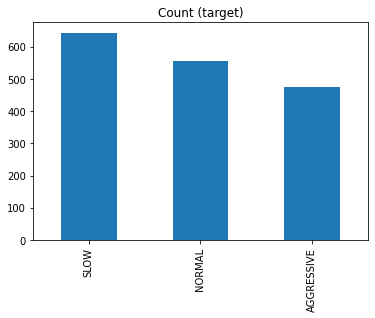

In [234]:
df_positive = df_training
df_positive = df_positive[df_positive["VelY"] >= 0]

target_count = df_positive.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 1:', target_count[2])

target_count.plot(kind='bar', title='Count (target)')


Class 0: 664
Class 1: 606
Class 1: 557


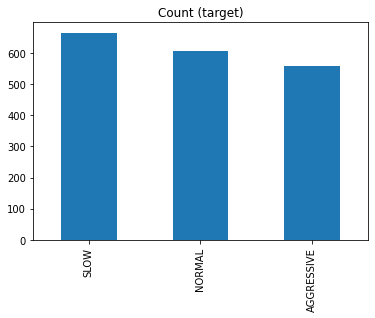

In [235]:
df_positive = df_training
df_positive = df_positive[df_positive["VelZ"] >= 0]

target_count = df_positive.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 1:', target_count[2])

target_count.plot(kind='bar', title='Count (target)');

### Percentile

In [236]:
Q1v = np.percentile(df_training.AccX, 25)
Q2v = np.percentile(df_training.AccX, 50)
Q3v = np.percentile(df_training.AccX, 75)
IQRv = Q3v - Q1v

Lsv = Q3v + 1.5 * IQRv
Liv = Q1v - 1.5 * IQRv


In [237]:
df_training.quantile(0.25)

AccX        -5.506954e-01
AccY        -5.925396e-01
AccZ        -5.584636e-01
GyroX       -2.855795e-02
GyroY       -5.375614e-02
GyroZ       -2.939789e-02
Timestamp    3.582121e+06
DiffAccX    -6.652661e-01
DiffAccY    -6.586280e-01
VelX        -9.912517e-01
VelY        -1.066571e+00
VelZ        -1.005234e+00
Name: 0.25, dtype: float64

In [238]:
df_training.quantile(0.5)


AccX         3.931045e-03
AccY        -8.083267e-02
AccZ         2.261639e-03
GyroX        1.985312e-03
GyroY       -1.832596e-03
GyroZ        2.977968e-03
Timestamp    3.582702e+06
DiffAccX     2.213180e-02
DiffAccY    -1.287174e-02
VelX         7.075882e-03
VelY        -1.454988e-01
VelZ         4.566193e-03
Name: 0.5, dtype: float64

In [239]:
df_training.quantile(0.75)

AccX         5.959871e-01
AccY         4.524008e-01
AccZ         5.561569e-01
GyroX        3.191771e-02
GyroY        5.131268e-02
GyroZ        4.085161e-02
Timestamp    3.583270e+06
DiffAccX     6.769278e-01
DiffAccY     6.598833e-01
VelX         1.072777e+00
VelY         8.143214e-01
VelZ         1.001082e+00
Name: 0.75, dtype: float64

## Check for atypical data

With atypical data we are still not sure if we would have to remove, because we think atypical data is what represents an aggressive and slow type of driver.

<AxesSubplot:xlabel='AccX'>

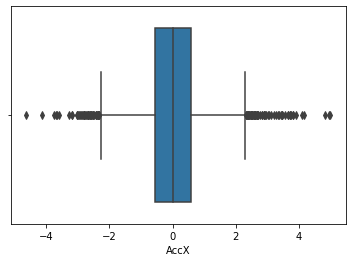

In [240]:
sns.boxplot(x=df_training.AccX)

In [241]:
Q1v = np.percentile(df_training.AccX, 25)
Q3v = np.percentile(df_training.AccX, 75)
IQRv = Q3v - Q1v

Lsv = Q3v + 1.5 * IQRv
Liv = Q1v - 1.5 * IQRv

In [242]:
Lsuperior = df_training[df_training.AccX > Lsv].index
Lsuperior

Int64Index([  88,   91,  396,  550,  746,  751,  897,  986, 1058, 1197, 1200,
            1201, 1265, 1283, 1284, 1285, 1288, 1290, 1291, 1321, 1374, 1375,
            1775, 1776, 1777, 1822, 1824, 1872, 1874, 2042, 2043, 2045, 2072,
            2073, 2076, 2097, 2110, 2115, 2116, 2147, 2189, 2190, 2191, 2192,
            2193, 2196, 2219, 2220, 2221, 2222, 2223, 2224, 2238, 2239, 2311,
            2354, 2355, 2424, 2431, 2465, 2660, 2945, 3124, 3496, 3505, 3611],
           dtype='int64')

In [243]:
Linferior = df_training[df_training.AccX < Liv].index
Linferior

Int64Index([  30,   67,   68,  143,  249,  251,  879,  905,  910, 1185, 1205,
            1206, 1255, 1257, 1277, 1278, 1298, 1344, 1361, 1465, 1483, 1498,
            1499, 1611, 1815, 1849, 1858, 1859, 1905, 1920, 2086, 2087, 2089,
            2106, 2107, 2174, 2176, 2178, 2180, 2183, 2373, 2698, 3163, 3427,
            3439, 3637],
           dtype='int64')

In [244]:
df_training.drop(Lsuperior, inplace=True)
df_training.drop(Linferior, inplace=True)

In [245]:
y = df_training.Class

print(y.unique())
print(y.value_counts())

normal_count = y.value_counts()[0]
aggressive_count = y.value_counts()[1]
slow_count = y.value_counts()[2]

Ntotal = normal_count + aggressive_count + slow_count

print(f"Proportion of Normal is {(normal_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Aggressive is {(aggressive_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Slow is {(slow_count / Ntotal) * 100:0.1f}%")

['NORMAL' 'AGGRESSIVE' 'SLOW']
SLOW          1314
NORMAL        1180
AGGRESSIVE    1038
Name: Class, dtype: int64
Proportion of Normal is 37.2%
Proportion of Aggressive is 33.4%
Proportion of Slow is 29.4%


<AxesSubplot:xlabel='AccY'>

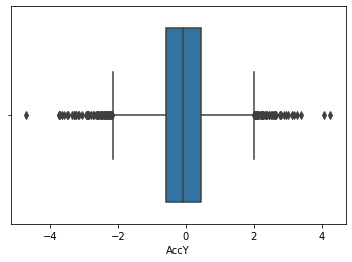

In [246]:
sns.boxplot(x=df_training.AccY)

In [247]:
Q1v = np.percentile(df_training.AccY, 25)
Q3v = np.percentile(df_training.AccY, 75)
IQRv = Q3v - Q1v

Lsv = Q3v + 1.5 * IQRv

In [248]:
Lsuperior = df_training[df_training.AccY > Lsv].index
Lsuperior

Int64Index([ 257,  679,  770,  868,  899,  902,  904,  978,  980, 1043, 1044,
            1045, 1086, 1089, 1195, 1242, 1269, 1335, 1413, 1414, 1415, 1442,
            1443, 1444, 1453, 1454, 1455, 1459, 1681, 1716, 1726, 1780, 1881,
            1882, 1952, 1969, 1971, 2021, 2023, 2024, 2044, 2154, 2214, 2243,
            2274, 2277, 2375, 2413, 2661, 2747, 3033, 3108, 3200, 3530, 3615],
           dtype='int64')

In [249]:
Linferior = df_training[df_training.AccY < Liv].index
Linferior

Int64Index([ 128,  569,  590,  591,  598,  637, 1034, 1054, 1146, 1177, 1178,
            1241, 1262, 1263, 1264, 1301, 1303, 1328, 1329, 1331, 1345, 1351,
            1352, 1385, 1505, 1531, 1551, 1552, 1790, 1791, 1828, 1834, 1848,
            1892, 1928, 2007, 2011, 2055, 2056, 2172, 2173, 2200, 2201, 2205,
            2270, 2271, 2297, 2387, 2412, 3177, 3521],
           dtype='int64')

In [250]:
df_training.drop(Lsuperior, inplace=True)
df_training.drop(Linferior, inplace=True)

In [251]:
y = df_training.Class

print(y.unique())
print(y.value_counts())

normal_count = y.value_counts()[0]
aggressive_count = y.value_counts()[1]
slow_count = y.value_counts()[2]

Ntotal = normal_count + aggressive_count + slow_count

print(f"Proportion of Normal is {(normal_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Aggressive is {(aggressive_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Slow is {(slow_count / Ntotal) * 100:0.1f}%")

['NORMAL' 'AGGRESSIVE' 'SLOW']
SLOW          1301
NORMAL        1154
AGGRESSIVE     971
Name: Class, dtype: int64
Proportion of Normal is 38.0%
Proportion of Aggressive is 33.7%
Proportion of Slow is 28.3%


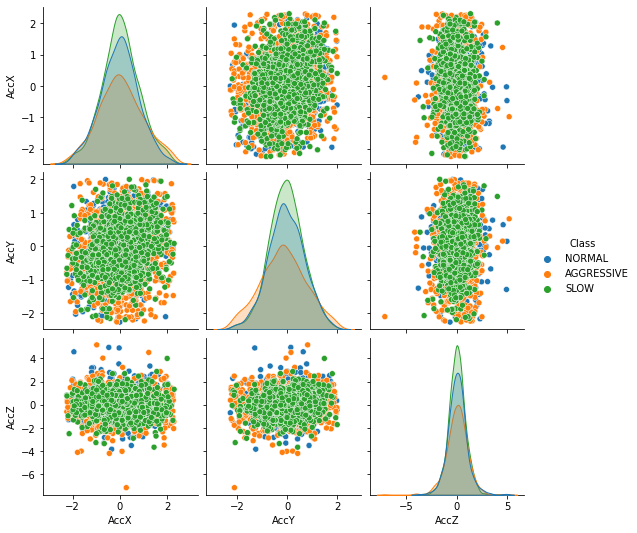

In [252]:
sns.pairplot(df_training[["AccX", "AccY", "AccZ", "Class"]], hue="Class")

At the end we can see that our hypothesis was correct majority of the atypical data (at least for AccX and AccY) represent the aggressive type of driver, but it seems that not the slow driver and more the normal and aggressive one, so with these we are still not sure just if we should remove atypical data, probably not.